In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Apr  5 17:22:13 2022

@author: alfonso
"""


"""
**********
Plutchik
**********

This package contains a data visualization tool for corpora annotated with emotions.
Given a JSON representation of the Plutchik's emotions (or dyads) in a text or in a group of texts, 
it draws the corresponding Plutchik's flower.

See Plutchik, Robert. "A general psychoevolutionary theory of emotion." Theories of emotion. Academic press, 1980. 3-33.

--------
repository available at https://www.github.com/alfonsosemeraro/pyplutchik
@author: Alfonso Semeraro <alfonso.semeraro@gmail.com>

"""

import shapely.geometry as sg
import matplotlib.pyplot as plt
import descartes
from math import sqrt, cos, sin, radians
import numpy as np
from matplotlib import colors
import warnings


## DeprecationWarnings from shapely are disabled
## As suggested in https://shapely.readthedocs.io/en/latest/migration.html
warnings.filterwarnings(
    action='ignore',
    module='descartes'
)

__author__ = """Alfonso Semeraro (alfonso.semeraro@gmail.com)"""
__all__ = ['emo_params',
           'dyad_params',
           '_rotate_point',
           '_polar_coordinates',
           '_neutral_central_circle',
           '_petal_shape_emotion',
           '_petal_shape_dyad',
           '_petal_spine_emotion',
           '_petal_spine_dyad',
           '_petal_circle',
           '_draw_emotion_petal',
           '_draw_dyad_petal',
           '_check_scores_kind',
           'plutchik']




def emo_params(emotion):
    """
    Gets color and angle for drawing a petal.
    Color and angle depend on the emotion name.

    Required arguments:
    ----------
    *emotion*:
        Emotion's name. Possible values: 
        ['joy', 'trust', 'fear', 'surprise', 'sadness', 'disgust', 'anger', 'anticipation']
    
    
    Returns:
    ----------
    *color*:
        Matplotlib color for the petal. See: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
        
    *angle*:
        Each subsequent petal is rotated 45° around the origin.    
        
        
    Notes:
    -----
    This function allows also 8 principal emotions, one for each Plutchik's flower petal.
    No high or low intensity emotions are allowed (no 'ecstasy' or 'serenity', for instance).
    """
    
    if emotion == 'joy':
        color = 'gold'
        angle = 0
    elif emotion == 'trust':
        color = 'olivedrab'
        angle = -45
    elif emotion == 'fear':
        color = 'forestgreen'
        angle = -90
    elif emotion == 'surprise':
        color = 'skyblue'
        angle = -135
    elif emotion == 'sadness':
        color = 'dodgerblue'
        angle = -180
    elif emotion == 'disgust':
        color = 'slateblue'
        angle = -225
    elif emotion == 'anger':
        color = 'orangered'
        angle = -270
    elif emotion == 'anticipation':
        color = 'darkorange'
        angle = -315
    else:
        raise Exception("""Bad input: {} is not an accepted emotion.
                        Must be one of 'joy', 'trust', 'fear', 'surprise', 'sadness', 'disgust', 'anger', 'anticipation'""".format(emotion))
    return color, angle, 0




def dyad_params(dyad):
    """
    Gets colormap and angle for drawing a dyad.
    Colormap and angle depend on the dyad name.

    Required arguments:
    ----------
    *dyad*:
        Dyad's name. Possible values: 
         
        {"primary": ['love', 'submission', 'alarm', 'disappointment', 'remorse', 'contempt', 'aggression', 'optimism'],
         "secondary": ['guilt', 'curiosity', 'despair', '', 'envy', 'cynism', 'pride', 'fatalism'],
         "tertiary": ['delight', 'sentimentality', 'shame', 'outrage', 'pessimism', 'morbidness', 'dominance', 'anxiety']}
    
    Returns:
    ----------
    *colormap*:
        Matplotlib colormap for the dyad. See: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
        
    *angle*:
        Each subsequent dyad is rotated 45° around the origin.  
        
    
    """
    
    
    # PRIMARY DYADS
    if dyad == 'love':
        cmap = ['gold', 'olivedrab']
        angle = -45 / 2
        emos = ['joy', 'trust']
        level = 1
        
    elif dyad == 'submission':
        cmap = ['olivedrab', 'forestgreen']
        angle = (-45 / 2) + (-45)
        emos = ['trust', 'fear']
        level = 1
        
    elif dyad == 'alarm':
        cmap = ['forestgreen', 'skyblue']
        angle = (-45 / 2) + (-90)
        emos = ['fear', 'surprise']
        level = 1
        
    elif dyad == 'disappointment':
        cmap = ['skyblue', 'dodgerblue']
        angle = (-45 / 2) + (-135)
        emos = ['surprise', 'sadness']
        level = 1
        
    elif dyad == 'remorse':
        cmap = ['dodgerblue', 'slateblue']
        angle = (-45 / 2) + (-180)
        emos = ['sadness', 'disgust']
        level = 1
        
    elif dyad == 'contempt':
        cmap = ['slateblue', 'orangered']
        angle = (-45 / 2) + (-225)
        emos = ['disgust', 'anger']
        level = 1
        
    elif dyad == 'aggressiveness':
        cmap = ['orangered', 'darkorange']
        angle = (-45 / 2) + (-270)
        emos = ['anger', 'anticipation']
        level = 1
        
    elif dyad == 'optimism':
        cmap = ['darkorange', 'gold']
        angle = (-45 / 2) + (-315)
        emos = ['anticipation', 'joy']
        level = 1
        
        
    # SECONDARY DYADS
    elif dyad == 'guilt':
        cmap = ['gold', 'forestgreen']
        angle = -45
        emos = ['joy', 'fear']
        level = 2
        
    elif dyad == 'curiosity':
        cmap = ['olivedrab', 'skyblue']
        angle = -90
        emos = ['trust', 'surprise']
        level = 2
        
    elif dyad == 'despair':
        cmap = ['forestgreen', 'dodgerblue']
        angle = -135
        emos = ['fear', 'sadness']
        level = 2
                
    elif dyad == 'unbelief':
        cmap = ['skyblue', 'slateblue']
        angle = -180
        emos = ['surprise', 'disgust']
        level = 2
        
    elif dyad == 'envy':
        cmap = ['dodgerblue', 'orangered']
        angle = -225
        emos = ['sadness', 'anger']
        level = 2
        
    elif dyad == 'cynism':
        cmap = ['slateblue', 'darkorange']
        angle = -270
        emos = ['disgust', 'anticipation']
        level = 2
        
    elif dyad == 'pride':
        cmap = ['orangered', 'gold']
        angle = -315
        emos = ['anger', 'joy']
        level = 2
        
    elif dyad == 'hope':
        cmap = ['darkorange', 'olivedrab']
        angle = 0
        emos = ['anticipation', 'trust']
        level = 2
        
    # TERTIARY DYADS
    elif dyad == 'delight':
        cmap = ['gold', 'skyblue']
        angle = (-45 / 2) + (-45)
        emos = ['joy', 'surprise']
        level = 3
        
    elif dyad == 'sentimentality':
        cmap = ['olivedrab', 'dodgerblue']
        angle = (-45 / 2) + (-90)
        emos = ['trust', 'sadness']
        level = 3
        
    elif dyad == 'shame':
        cmap = ['forestgreen', 'slateblue']
        angle = (-45 / 2) + (-135)
        emos = ['fear', 'disgust']
        level = 3
        
    elif dyad == 'outrage':
        cmap = ['skyblue', 'orangered']
        angle = (-45 / 2) + (-180)
        emos = ['surprise', 'anger']
        level = 3
        
    elif dyad == 'pessimism':
        cmap = ['dodgerblue', 'darkorange']
        angle = (-45 / 2) + (-225)
        emos = ['sadness', 'anticipation']
        level = 3
        
    elif dyad == 'morbidness':
        cmap = ['slateblue', 'gold']
        angle = (-45 / 2) + (-270)
        emos = ['disgust', 'joy']
        level = 3
        
    elif dyad == 'dominance':
        cmap = ['orangered', 'olivedrab']
        angle = (-45 / 2) + (-315)
        emos = ['anger', 'trust']
        level = 3
        
    elif dyad == 'anxiety':
        cmap = ['darkorange', 'forestgreen']
        angle = (-45 / 2)
        emos = ['anticipation', 'fear']
        level = 3
        
        
    # OPPOSITES
    elif dyad == 'bittersweetness':
        cmap = ['gold', 'dodgerblue']
        angle = 0
        emos = ['joy', 'sadness']
        level = 4
        
    elif dyad == 'ambivalence':
        cmap = ['olivedrab', 'slateblue']
        angle = -45
        emos = ['trust', 'disgust']
        level = 4
        
    elif dyad == 'frozenness':
        cmap = ['forestgreen', 'orangered']
        angle = -90
        emos = ['fear', 'anger']
        level = 4
                
    elif dyad == 'confusion':
        cmap = ['skyblue', 'darkorange']
        angle = -135
        emos = ['surprise', 'anticipation']
        level = 4
    
    
    else:
        raise Exception("""Bad input: '{}' is not an accepted name for a dyad.
                        Must be one of:
                            'love', 'submission', 'alarm', 'disappointment', 'remorse', 'contempt', 'aggressiveness', 'optimism',
                            'guilt', 'curiosity', 'despair', 'unbelief', 'envy', 'cynism', 'pride', 'hope',
                            'delight', 'sentimentality', 'shame', 'outrage', 'pessimism', 'morbidness', 'dominance', 'anxiety',
                            'bittersweetness', 'ambivalence', 'frozenness', 'confusion'
                        """.format(dyad))
    return emos, cmap, angle, level


def _rotate_point(point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    Required arguments:
    ----------
    *point*:
        A two-values tuple, (x, y), of the point to rotate
        
    *angle*:
        The angle the point is rotated. The angle should be given in radians.
    
    Returns:
    ----------
    *(qx, qy)*:
        A two-values tuple, the new coordinates of the rotated point.     
        
    """
    ox, oy = 0, 0
    px, py = point
    angle = radians(angle)
    qx = ox + cos(angle) * (px - ox) - sin(angle) * (py - oy)
    qy = oy + sin(angle) * (px - ox) + cos(angle) * (py - oy)
    return (qx, qy)




def _polar_coordinates(ax, font, fontweight, fontsize, show_ticklabels, ticklabels_angle, ticklabels_size, offset = .15):
    """
    Draws polar coordinates as a background.

    Required arguments:
    ----------
    *ax*:
        Axes to draw the coordinates.
        
    *font*:
        Font of text. Default is Montserrat.
        
    *fontweight*:
        Font weight of text. Default is light.
        
    *fontsize*:
        Font size of text. Default is 15.
        
    *show_ticklabels*:
        Boolean, wether to show tick labels under Joy petal. Default is False.
        
    *ticklabels_angle*:
        How much to rotate tick labels from y=0. Value should be given in radians. Default is 0.
        
    *ticklabels_size*:
        Size of tick labels. Default is 11.
        
    *offset*:
        Central neutral circle has radius = .15, and coordinates must start from there.
    
    Returns:
    ----------
    *ax*:
        The input Axes modified.     
        
    """
    
    # Lines
    for i in range(0, 110, 20):
        c = plt.Circle((0, 0), offset + i/100, color = 'grey', alpha = .3, fill = False, zorder = -20)
        ax.add_artist(c)

        
    # Tick labels
    if show_ticklabels:
        for x in np.arange(0.2, 1.2, .2):
            a = round(x, 1)
            x, y = _rotate_point((0, a + offset), ticklabels_angle) #-.12
            ax.annotate(str(a), xy = (x, y),  fontfamily = font, size = ticklabels_size, fontweight = fontweight, zorder = 8, rotation = ticklabels_angle)
    return ax


def _neutral_central_circle(ax, r = .15):
    """
    Draws central neutral circle (in grey).

    Required arguments:
    ----------
    *ax*:
        Axes to draw the coordinates.
        
    *r*:
        Radius of the circle. Default is .15.
        
    Returns:
    ----------
    *ax*:
        The input Axes modified.     
        
    """
    c = sg.Point(0, 0).buffer(r)
    ax.add_patch(descartes.PolygonPatch(c, fc='white', ec=(.5, .5, .5, .3), alpha=1, zorder = 15))
    
    return ax
    

def _outer_border(ax, emotion_score, color, angle, highlight, offset = .15, height_width_ratio = 1, normalize = False):
    """
    Draw a the outer border of a petal.
    
    Required arguments:
    ----------
    *ax*:
        Axes to draw the coordinates.
        
    *emotion_score*:
        Score of the emotion. Values range from 0 to 1.
       
    *color*:
        Color of the petal. See emo_params().       
        
    *angle*:
        Rotation angle of the petal. See emo_params().
        
    *highlight*:
        String. 'opaque' if the petal must be shadowed, 'regular' is default.
        
    *offset*:
        Central neutral circle has radius = .15, and petals must start from there.
    
    *height_width_ratio*:
        Ratio between height and width of the petal. Lower the ratio, thicker the petal. Default is 1.
        
    *normalize*:
        Either False or the highest value among emotions. If not False, must normalize all petal lengths.
        
    """
    
    if normalize:
        emotion_score /= normalize
        
    # Computing proportions. 
    h = 1*emotion_score + offset
    x = height_width_ratio*emotion_score
    y = h/2 
    r = sqrt(x**2 + y**2)
    
    # Computing rotated centers
    x_right, y_right = _rotate_point((x, y), angle)
    x_left, y_left = _rotate_point((-x, y), angle)
    
    # Circles and intersection
    right = sg.Point(x_right, y_right).buffer(r)
    left = sg.Point(x_left, y_left).buffer(r)
    petal = right.intersection(left)
    
    # alpha and color
    alpha = 1 if highlight == 'regular' else .8
    ecol = (colors.to_rgba(color)[0], colors.to_rgba(color)[1], colors.to_rgba(color)[2], alpha)


    ax.add_patch(descartes.PolygonPatch(petal, fc=(0, 0, 0, 0), ec = ecol, lw= 1))
    
    
    
def _petal_shape_emotion(ax, emotion_score, color, angle, font, fontweight, fontsize, highlight, will_circle, offset = .15, height_width_ratio = 1, normalize = False, highlight_intensity=-1):
    """
    Draw a petal.
    A petal is the intersection area between two circles.
    The height of the petal depends on the radius and the center of the circles.
    Full details at http://www.github.com/alfonsosemeraro/plutchik/tutorial.ipynb
    
    Required arguments:
    ----------
    *ax*:
        Axes to draw the coordinates.
        
    *emotion_score*:
        Score of the emotion. Values range from 0 to 1.
       
    *color*:
        Color of the petal. See emo_params().
        
    *angle*:
        Rotation angle of the petal. See emo_params().
        
    *font*:
        Font of text. Default is Montserrat.
        
    *fontweight*:
        Font weight of text. Default is light.
        
    *fontsize*:
        Font size of text. Default is 15.
        
    *highlight*:
        String. 'opaque' if the petal must be shadowed, 'regular' is default.
        
    *will_circle*:
        Boolean. If three intensities will be plotted, then the lower petal must be pale.
        
    *offset*:
        Central neutral circle has radius = .15, and petals must start from there.
    
    *height_width_ratio*:
        Ratio between height and width of the petal. Lower the ratio, thicker the petal. Default is 1.
        
    *normalize*:
        Either False or the highest value among emotions. If not False, must normalize all petal lengths.
        
    Returns:
    ----------
    *petal*:
        The petal, a shapely shape.     
        
    """

    if normalize:
        emotion_score /= normalize
    
    # Computing proportions. 
    h = 1*emotion_score + offset
    x = height_width_ratio*emotion_score
    y = h/2 
    r = sqrt(x**2 + y**2)
    
    # Computing rotated centers
    x_right, y_right = _rotate_point((x, y), angle)
    x_left, y_left = _rotate_point((-x, y), angle)
    
    # Circles and intersection
    right = sg.Point(x_right, y_right).buffer(r)
    left = sg.Point(x_left, y_left).buffer(r)
    petal = right.intersection(left)
    
    # Alpha for highlighting
    if highlight == 'regular':
        if will_circle:
            alpha = .3
        else:
            alpha = .5
            
    elif will_circle:
        alpha = .0
        
    else:
        alpha = .0
        
    fc0 = 'white'
    if highlight == 'regular':
        if highlight_intensity >= 0 and highlight_intensity == 0:
            fc0 = color
    
    ax.add_patch(descartes.PolygonPatch(petal, fc=fc0, lw = 0, alpha=1, zorder = 0))
    ax.add_patch(descartes.PolygonPatch(petal, fc=color, lw= 0, alpha=alpha, zorder = 10))
    
    return petal

def _petal_shape_dyad(ax, emotion_score, colorA, colorB, angle, font, fontweight, fontsize, highlight, will_circle, offset = .15, height_width_ratio = 1, normalize = False):
    """
    Draw a petal.
    A petal is the intersection area between two circles.
    The height of the petal depends on the radius and the center of the circles.
    Full details at http://www.github.com/alfonsosemeraro/plutchik/tutorial.ipynb
    
    Required arguments:
    ----------
    *ax*:
        Axes to draw the coordinates.
        
    *emotion_score*:
        Score of the emotion. Values range from 0 to 1.
       
    *colorA*:
        First color of the petal. See dyad_params().
       
    *colorB*:
        Second color of the petal. See dyad_params().
        
    *angle*:
        Rotation angle of the petal. See dyad_params().
        
    *font*:
        Font of text. Default is Montserrat.
        
    *fontweight*:
        Font weight of text. Default is light.
        
    *fontsize*:
        Font size of text. Default is 15.
        
    *highlight*:
        String. 'opaque' if the petal must be shadowed, 'regular' is default.
        
    *will_circle*:
        Boolean. If three intensities will be plotted, then the lower petal must be pale.
        
    *offset*:
        Central neutral circle has radius = .15, and petals must start from there.
    
    *height_width_ratio*:
        Ratio between height and width of the petal. Lower the ratio, thicker the petal. Default is 1.
        
    *normalize*:
        Either False or the highest value among emotions. If not False, must normalize all petal lengths.
        
    Returns:
    ----------
    *petal*:
        The petal, a shapely shape.     
        
    """

    if emotion_score == 0:
        return ax
    
    if normalize:
        emotion_score /= normalize
        
    # Computing proportions. 
    h = 1*emotion_score + offset
    x = height_width_ratio*emotion_score
    y = h/2 
    r = sqrt(x**2 + y**2)
    
    # Computing rotated centers
    x_right, y_right = _rotate_point((x, y), angle)
    x_left, y_left = _rotate_point((-x, y), angle)
    
    # Circles and intersection
    right = sg.Point(x_right, y_right).buffer(r)
    left = sg.Point(x_left, y_left).buffer(r)
    petal = right.intersection(left)
    
       
    # Computing squares: left
    A = _rotate_point((-2*x, 0), angle)
    B = _rotate_point((-2*x, h), angle)
    C = _rotate_point((0, h), angle)
    D = _rotate_point((0, 0), angle)
    square_left = sg.Polygon([A, B, C, D, A])
    
    # Computing squares: right
    A = _rotate_point((0, 0), angle)
    B = _rotate_point((0, h), angle)
    C = _rotate_point((2*x, h), angle)
    D = _rotate_point((2*x, 0), angle)
    square_right = sg.Polygon([A, B, C, D, A])
    
    # Computing semipetals
    petalA = petal.intersection(square_left)
    petalB = petal.intersection(square_right)
    
        
    # white petal underneath
    ax.add_patch(descartes.PolygonPatch(petal, fc='white', lw = 0, alpha=1, zorder = 0))
    
    # Draw each half-petal in alpha 0.7
    alpha = .7
    
    xs, ys = petalA.exterior.xy    
    ax.fill(xs, ys, alpha=alpha, fc= colorA, ec='none')
    
    xs, ys = petalB.exterior.xy    
    ax.fill(xs, ys, alpha=alpha, fc=colorB, ec='none')
    
    return ax


def _petal_spine_emotion(ax, emotion, emotion_score, color, angle, font, fontweight, fontsize, highlight = 'all', offset = .15, sub_emotion='', highlight_intensity = -1):
    """
    Draw the spine beneath a petal, and the annotation of emotion and emotion's value.
    The spine is a straight line from the center, of length 1.03.
    Full details at http://www.github.com/alfonsosemeraro/plutchik/tutorial.ipynb
    
    Required arguments:
    ----------
    *ax*:
        Axes to draw the coordinates.
        
    *emotion*:
        Emotion's name.
        
    *emotion_score*:
        Score of the emotion. Values range from 0 to 1. if list, it must contain 3 values that sum up to 1.
       
    *color*:
        Color of the petal. See emo_params().
        
    *angle*:
        Rotation angle of the petal. See emo_params().
        
    *font*:
        Font of text. Default is Montserrat.
        
    *fontweight*:
        Font weight of text. Default is light.
        
    *fontsize*:
        Font size of text. Default is 15.
        
    *highlight*:
        String. 'opaque' if the petal must be shadowed, 'regular' is default.
        
    *offset*:
        Central neutral circle has radius = .15, and petals must start from there.
        
    """
    
    # Diagonal lines and ticks
    step = .03
    p1 = (0, 0)
    p2 = _rotate_point((0, 1 + step + offset), angle) # draw line until 0, 1 + step + offset
    p3 = _rotate_point((-step, 1 + step + offset), angle) # draw tick
    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], zorder = 5, color = 'black', alpha = .3, linewidth = .75)
    ax.plot([p2[0], p3[0]], [p2[1], p3[1]], zorder = 5, color = 'black', alpha = .3, linewidth = .75)
    
    # Managing highlighting and transparency
    if highlight == 'opaque':
        alpha = .8
        color = 'lightgrey'
    else:
        alpha = 1
    
    # Checking if iterable
    try:
        _ = emotion_score[0]
        iterable = True
    except:
        iterable = False
       
    label_name = None
    if highlight == 'regular' and highlight_intensity >= 0:
        label_name = sub_emotion
        
    if iterable:
        # Label
        angle2 = angle + 180 if -110 > angle > -260 else angle
        p4 = _rotate_point((0, 1.40 + step + offset), angle)
        ax.annotate(emotion, xy = p4, rotation = angle2, ha='center', va = 'center',
                    fontfamily = font, size = fontsize, fontweight = fontweight)
        
        # Score 1
        p5 = _rotate_point((0, 1.07 + step + offset), angle)
        ax.annotate("{0:.2f}".format(round(emotion_score[0],2)), xy = p5, rotation = angle2, ha='center', va = 'center',
                    color = color, fontfamily = font, size = fontsize, fontweight = 'regular', alpha = alpha)
        
        # Score 2
        p6 = _rotate_point((0, 1.17 + step + offset), angle)
        ax.annotate("{0:.2f}".format(round(emotion_score[1],2)), xy = p6, rotation = angle2, ha='center', va = 'center',
                    color = color, fontfamily = font, size = fontsize, fontweight = 'demibold', alpha = alpha)
        
        # Score 3
        p7 = _rotate_point((0, 1.27 + step + offset), angle)
        ax.annotate("{0:.2f}".format(round(emotion_score[2],2)), xy = p7, rotation = angle2, ha='center', va = 'center',
                    color = color, fontfamily = font, size = fontsize, fontweight = 'regular', alpha = alpha)        
        
    else:  
        # Label
        angle2 = angle + 180 if -110 > angle > -260 else angle
        p4 = _rotate_point((0, 1.23 + step + offset), angle)
        ax.annotate(emotion, xy = p4, rotation = angle2, ha='center', va = 'center',
                    fontfamily = font, size = fontsize, fontweight = fontweight)
        
        # Score
        if label_name:
            p5 = _rotate_point((0, 1.1 + step + offset), angle)
            ax.annotate(label_name, xy = p5, rotation = angle2, ha='center', va = 'center',
                        color = color, fontfamily = font, size = fontsize, fontweight = 'demibold', alpha = alpha)
        
        
        
def _petal_spine_dyad(ax, dyad, dyad_score, color, emotion_names, angle, font, fontweight, fontsize, highlight = 'all', offset = .15):
    """
    Draw the spine beneath a petal, and the annotation of dyad and dyad's value.
    The spine is a straight line from the center, of length 1.03.
    Full details at http://www.github.com/alfonsosemeraro/plutchik/tutorial.ipynb
    
    Required arguments:
    ----------
    *ax*:
        Axes to draw the coordinates.
        
    *dyad*:
        Dyad's name.
        
    *dyad_score*:
        Score of the dyad. Values range from 0 to 1. if list, it must contain 3 values that sum up to 1.
       
    *color*:
        Color of the two emotions of the dyad. See dyad_params().
        
    *emotion_names*:
        Name of the emotions the dyad is made of. See dyad_params().
        
    *angle*:
        Rotation angle of the petal. See dyad_params().
        
    *font*:
        Font of text. Default is Montserrat.
        
    *fontweight*:
        Font weight of text. Default is light.
        
    *fontsize*:
        Font size of text. Default is 15.
        
    *highlight*:
        String. 'opaque' if the petal must be shadowed, 'regular' is default.
        
    *offset*:
        Central neutral circle has radius = .15, and petals must start from there.
        
    """
    
    # Diagonal lines and ticks
    step = .03
    p1 = (0, 0) # 0, 0 + offset
    p2 = _rotate_point((0, 1 + step + offset), angle) # draw line until 0, 1 + step + offset
    p3 = _rotate_point((-step, 1 + step + offset), angle) # draw tick
    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], zorder = 5, color = 'black', alpha = .3, linewidth = .75)
    ax.plot([p2[0], p3[0]], [p2[1], p3[1]], zorder = 5, color = 'black', alpha = .3, linewidth = .75)
    
    # Managing highlighting and opacity
    if highlight == 'opaque':
        alpha = .8
        color = 'lightgrey'
    else:
        alpha = 1
    
    
    ## Drawing the two-colored circular arc over dyads
    from matplotlib.patches import Arc
    
    H = 3.2
    
    pac1 = Arc((0, 0), width = H, height = H, angle = 90, theta2 = angle, theta1 = angle - 18, ec = color[1], linewidth = 3)
    pac2 = Arc((0, 0), width = H, height = H, angle = 90, theta2 = angle + 18, theta1 = angle, ec = color[0], linewidth = 3)
    ax.add_patch(pac1)
    ax.add_patch(pac2)
    
    
    # Labels over the arcs 
    angle2 = angle + 180 if -110 > angle > -260 else angle
    p9 = _rotate_point((0, 1.7), angle - 9)
    ax.annotate(emotion_names[1], xy = p9, rotation = angle2 - 8, ha='center', va = 'center', zorder = 30,
                fontfamily = font, size = fontsize * .7, fontweight = 'demibold', color = color[1])
    p10 = _rotate_point((0, 1.7), angle + 9)
    ax.annotate(emotion_names[0], xy = p10, rotation = angle2 + 8, ha='center', va = 'center',  zorder = 30,
                fontfamily = font, size = fontsize * .7, fontweight = 'demibold', color = color[0])
    
    
    # Dyad label must be grey
    color = '#363636'
        
    # Label
    angle2 = angle + 180 if -110 > angle > -260 else angle
    p4 = _rotate_point((0, 1.23 + step + offset), angle)
    ax.annotate(dyad, xy = p4, rotation = angle2, ha='center', va = 'center',
                fontfamily = font, size = fontsize, fontweight = fontweight)
    
    # Score
    p5 = _rotate_point((0, 1.1 + step + offset), angle)
    ax.annotate("{0:.2f}".format(round(dyad_score,2)), xy = p5, rotation = angle2, ha='center', va = 'center',
                color = color, fontfamily = font, size = fontsize, fontweight = 'demibold', alpha = alpha)
    
    
    
    
def _petal_circle(ax, petal, radius, color, inner = False, highlight = 'none', offset = .15, normalize = False, highlight_intensity = -1):
    """
    Each petal may have 3 degrees of intensity.
    Each of the three sections of a petal is the interception between
    the petal and up to two concentric circles from the origin.
    This function draws one section.
    Full details at http://www.github.com/alfonsosemeraro/plutchik/tutorial.ipynb
    
    Required arguments:
    ----------
    *ax*:
        Axes to draw the coordinates.
        
    *petal*:
        The petal shape. See petal().
        
    *radius*:
        Radius of the section.
       
    *color*:
        Color of the section. See emo_params().
        
    *inner*:
        Boolean. If True, a second patch is drawn with alpha = 0.3, making the inner circle darker.
        
    *highlight*:
        String. 'opaque' if the petal must be shadowed, 'regular' is default.
        
    *offset*:
        Central neutral circle has radius = .15, and petals must start from there.
        
    *normalize*:
        Either False or the highest value among emotions. If not False, must normalize all petal lengths.
    
    """
    
    if radius:
        
        if normalize:
            radius /= normalize
            
        # Define the intersection between circle c and petal
        c = sg.Point(0, 0).buffer(radius + offset)
        area = petal.intersection(c)
        
        # Managing alpha and color
        alpha0 = 1 if highlight == 'regular' else .2
        ecol = (colors.to_rgba(color)[0], colors.to_rgba(color)[1], colors.to_rgba(color)[2], alpha0)
        
        alpha1 = 1 if highlight == 'regular' else .0
        if highlight_intensity >= 0 and highlight_intensity == 1:
            fc1 = color
        else:
            fc1 = (1, 1, 1, 1)
        
        # Drawing separately the shape and a thicker border
        ax.add_patch(descartes.PolygonPatch(area, fc=fc1, ec = 'black', lw = 0, alpha=alpha1)) # Second
        ax.add_patch(descartes.PolygonPatch(area, fc=(0, 0, 0, 0), ec = ecol, lw = 1.3))
        
        # The innermost circle gets to be brighter because of the repeated overlap
        # Its alpha is diminished to avoid too much bright colors
        if inner:
            alpha2 = 1 if highlight == 'regular' else .0
            if highlight_intensity >= 0 and highlight_intensity == 2:
                fc2 = color
            else:
                fc2 = (1, 1, 1, 1)
            ax.add_patch(descartes.PolygonPatch(area, fc=fc2, ec = 'w', lw = 0, alpha=alpha2)) # Inner 
            ax.add_patch(descartes.PolygonPatch(area, fc=(0, 0, 0, 0), ec = ecol, lw = 1.5))
    

def _draw_emotion_petal(ax, emotion, emotion_score, highlight_emotions, show_intensity_labels, font, fontweight, fontsize, show_coordinates, height_width_ratio, normalize = False, highlight_intensity = -1, sub_emotion = ''):
    """
    Draw the petal and its possible sections.
    Full details at http://www.github.com/alfonsosemeraro/plutchik/tutorial.ipynb
    
    Required arguments:
    ----------
    *ax*:
        Axes to draw the coordinates.
        
    *emotion*:
        Emotion's name.
        
    *emotion_score*:
        Score of the emotion. Values range from 0 to 1.
    
    *highlight_emotions*:
        A list of main emotions to highlight. Other emotions will be shadowed.
        
    *show_intensity_labels*:
        A string or a list of main emotions. It shows all three intensity scores for each emotion in the list, and for the others cumulative scores. Default is 'none'.
         
    *font*:
        Font of text. Default is Montserrat.
        
    *fontweight*:
        Font weight of text. Default is light.
        
    *fontsize*:
        Font size of text. Default is 15.
        
    *offset*:
        Central neutral circle has radius = .15, and petals must start from there.
       
    *show_coordinates*:
        A boolean, wether to show polar coordinates or not.   
        
    *normalize*:
        Either False or the highest value among emotions. If not False, normalize petal length.
        
    """
    color, angle, _ = emo_params(emotion)
    
    # Check if iterable
    try:
        _ = emotion_score[0]
        iterable = True
    except:
        iterable = False
    
     
    # Manage highlight and opacity
    if highlight_emotions != 'all':
        if emotion in highlight_emotions:
            highlight = 'regular'
        else:
            highlight = 'opaque'
    else:
        highlight = 'regular'
        

    if not iterable:
        if show_coordinates:
            
            # Draw the line and tick behind a petal 
            _petal_spine_emotion(ax = ax, emotion = emotion, emotion_score = emotion_score, 
                        color = color, angle = angle, 
                        font = font, fontweight = fontweight, fontsize = fontsize, 
                        highlight = highlight,
                        offset = .15, highlight_intensity=highlight_intensity, sub_emotion=sub_emotion)
        # Draw petal
        _petal_shape_emotion(ax, emotion_score, color, angle, font, fontweight, fontsize, height_width_ratio = height_width_ratio, highlight = highlight, will_circle = False, normalize = normalize)
        # Draw border
        _outer_border(ax, emotion_score, color, angle, height_width_ratio = height_width_ratio, highlight = highlight, normalize = normalize)
        
    else:
        # Total length is the sum of the emotion score
        a, b, c = emotion_score
        length = a + b + c
        # Show three scores or just the cumulative one?
        label = emotion_score if ((show_intensity_labels == 'all') or (emotion in show_intensity_labels)) else length
        
        if show_coordinates:
            
            # Draw the line and tick behind a petal
            _petal_spine_emotion(ax = ax, emotion = emotion, emotion_score = label, 
                        color = color, angle = angle, 
                        font = font, fontweight = fontweight, fontsize = fontsize,
                        highlight = highlight,
                        offset = .15, highlight_intensity=highlight_intensity, sub_emotion=sub_emotion)
        
        # Draw petal
        petal_shape = _petal_shape_emotion(ax, length, color, angle, font, fontweight, fontsize, height_width_ratio = height_width_ratio, highlight = highlight, will_circle = True, normalize = normalize, highlight_intensity = highlight_intensity)
        # Draw inner petal section
        _petal_circle(ax, petal_shape, a + b, color, False, highlight, normalize = normalize, highlight_intensity = highlight_intensity)
        # Draw middle petal section
        _petal_circle(ax, petal_shape, a, color, True, highlight, normalize = normalize, highlight_intensity = highlight_intensity)        
        # Draw border
        _outer_border(ax, length, color, angle, height_width_ratio = height_width_ratio, highlight = highlight, normalize = normalize)
        
        
def _draw_dyad_petal(ax, dyad, dyad_score, font, fontweight, fontsize, show_coordinates, height_width_ratio, offset = .15, normalize = False):
    """
    Draw the petal and its possible sections.
    Full details at http://www.github.com/alfonsosemeraro/plutchik/tutorial.ipynb
    
    Required arguments:
    ----------
    *ax*:
        Axes to draw the coordinates.
        
    *dyad*:
        Dyad's name.
        
    *dyad_score*:
        Score of the dyad. Values range from 0 to 1.
    
    *font*:
        Font of text. Default is Montserrat.
        
    *fontweight*:
        Font weight of text. Default is light.
        
    *fontsize*:
        Font size of text. Default is 15.
        
    *offset*:
        Central neutral circle has radius = .15, and petals must start from there.
       
    *show_coordinates*:
        A boolean, wether to show polar coordinates or not.   
        
    *normalize*:
        Either False or the highest value among the dyads. If not False, normalize petal length.
        
    
    """
    emos, color, angle, _ = dyad_params(dyad)
    colorA, colorB = color
    
    if show_coordinates:
        # Draw the line and tick behind a petal
        _petal_spine_dyad(ax = ax, dyad = dyad, dyad_score = dyad_score, 
                        emotion_names = emos,
                        color = color, angle = angle, 
                        font = font, fontweight = fontweight, fontsize = fontsize, 
                        highlight = 'all',
                        offset = .15)
        
    # Draw petal (and get the modified ax)
    ax = _petal_shape_dyad(ax, dyad_score, colorA, colorB, angle, font, fontweight, fontsize, height_width_ratio = height_width_ratio, highlight = 'all', will_circle = False, normalize = normalize)
    # Draw border
    _outer_border(ax, dyad_score, colorA, angle, height_width_ratio = height_width_ratio, highlight = 'all', normalize = normalize)
        
       

  
    

def _check_scores_kind(tags):
    """
    Checks if the inputed scores are all of the same kind 
    (emotions or primary dyads or secondary dyads or tertiary dyads or opposites).
    
    No mixed kinds are allowed.
    
    Required arguments:
    ----------
          
    *tags*:
        List of the tags provided as 'scores'.
        
        
    Returns:
    ----------
    
    A boolean, True if `scores` contains emotions, False if it contains dyads.
    
    """
    kinds = []
    for t in tags:
        try:
            kinds += [emo_params(t)[2]]
        except:
            kinds += [dyad_params(t)[3]]

    unique_kinds = list(set(sorted(kinds)))
    
    if len(unique_kinds) > 1:
        unique_kinds_str = ', '.join([str(a) for a in unique_kinds])
        unique_kinds_str = unique_kinds_str.replace('0', 'emotions')
        unique_kinds_str = unique_kinds_str.replace('1', 'primary dyads')
        unique_kinds_str = unique_kinds_str.replace('2', 'secondary dyads')
        unique_kinds_str = unique_kinds_str.replace('3', 'tertiary dyads')
        unique_kinds_str = unique_kinds_str.replace('4', 'opposite emotions')
        unique_kinds_str = ' and'.join(unique_kinds_str.rsplit(',', 1))
                
        error_str = "Bad input: can't draw {} altogether. Please input only one of them as 'scores'.".format(unique_kinds_str)
        raise Exception(error_str)
        
    else:
        
        kind = kinds[0]
        
        if kind == 0:
            return True
        else:
            return False
    
def random_flower():
    """ Draws a Plutchik's flower with random scores """
    
    import random
    
    emo = {'joy': random.uniform(0, 1),
           'trust': random.uniform(0,1),
           'fear': random.uniform(0,1),
           'surprise': random.uniform(0,1),
           'sadness': random.uniform(0,1),
           'disgust': random.uniform(0,1),
           'anger': random.uniform(0,1),
           'anticipation': random.uniform(0,1)}
    
    plutchik(emo)
    
def plutchik(scores,
             ax = None, 
             font = None, 
             fontweight = 'light', 
             fontsize = 15, 
             show_coordinates = True, 
             show_ticklabels = False, 
             highlight_emotions = 'all', 
             show_intensity_labels = 'none', 
             ticklabels_angle = 0, 
             ticklabels_size = 11, 
             height_width_ratio = 1, 
             title = None, 
             title_size = None,
             normalize = False, highlight_intensity = -1, sub_emotion='annoyance'):
    """
    Draw the petal and its possible sections.
    Full details at http://www.github.com/alfonsosemeraro/plutchik/tutorial.ipynb
    
    Required arguments:
    ----------
          
    *scores*:
        A dictionary with emotions or dyads. 
        For each entry, values accepted are a 3-values iterable (for emotions only) or a scalar value between 0 and 1.
        The sum of the 3-values iterable values must not exceed 1, and no value should be negative.
        See emo_params() and dyad_params() for accepted keys.
                
        Emotions and dyads are mutually exclusive. Different kinds of dyads are mutually exclusive.
   
    *ax*:
        Axes to draw the coordinates.
        
    *font*:
        Font of text. Default is sans-serif.
        
    *fontweight*:
        Font weight of text. Default is light.
        
    *fontsize*:
        Font size of text. Default is 15.
        
    *offset*:
        Central neutral circle has radius = .15, and petals must start from there.
       
    *show_coordinates*:
        A boolean, wether to show polar coordinates or not.
        
    *show_ticklabels*:
        Boolean, wether to show tick labels under Joy petal. Default is False.
        
    *highlight_emotions*:
        A string or a list of main emotions to highlight. If a list of emotions is given, other emotions will be shadowed. Default is 'all'.
        
    *show_intensity_labels*:
        A string or a list of main emotions. It shows all three intensity scores for each emotion in the list, and for the others cumulative scores. Default is 'none'.
        
    *ticklabels_angle*:
        How much to rotate tick labels from y=0. Value should be given in radians. Default is 0.
        
    *ticklabels_size*:
        Size of tick labels. Default is 11.
        
    *height_width_ratio*:
        Ratio between height and width of the petal. Lower the ratio, thicker the petal. Default is 1.
        
    *title*:
        Title for the plot.
        
    *title_size*:
        Size of the title. Default is font_size.
        
    Returns:
    ----------
    *ax*:
        The input Axes modified.     
        
    """
    
    scores = {key.lower(): val for key, val in scores.items()}
    
    # Check if dyads or emotions, and what kind of dyads
    score_is_emotions = _check_scores_kind(scores)
    if score_is_emotions:
        emotions, dyads = scores, None
    else:
        emotions, dyads = None, scores
        
    # Create subplot if is not provided as parameter
    if not ax:
        fig, ax = plt.subplots(figsize = (8, 8))
    
    # Managing fonts
    if not font:
        font = 'sans-serif'
        
    
    
    # Draw coordinates (if needed) before any petal
    if show_coordinates:
        _polar_coordinates(ax, font, fontweight, fontsize, show_ticklabels, ticklabels_angle, ticklabels_size)
            
    # Draw inner white circle
    _neutral_central_circle(ax)
        
    
    # Emotions and dyads are mutually exclusive
    if emotions:
        emotions = {key.lower(): val for key, val in emotions.items()}
        
                
        for emo in emotions:
            
            # Check correctedness of values
            if hasattr(emotions[emo], '__iter__'): 
                if sum(emotions[emo]) > 1 or any([e < 0 for e in emotions[emo]]):
                    raise Exception("Bad input for `{}`. Emotion scores array should be between 0 and 1.".format(emo))
            else:
                if emotions[emo] > 1 or emotions[emo] < 0:
                    raise Exception("Bad input for `{}`. Emotion scores array should sum to between 0 and 1.".format(emo))
                 
            # Draw emotion petal
            _draw_emotion_petal(ax, emotion_score = emotions[emo], emotion = emo, 
                        font = font, fontweight = fontweight, fontsize = fontsize,
                        highlight_emotions = highlight_emotions, show_intensity_labels = show_intensity_labels,
                        show_coordinates = show_coordinates, height_width_ratio = height_width_ratio, normalize = normalize, highlight_intensity = highlight_intensity, sub_emotion = sub_emotion)
            
    elif dyads:
        
        for dyad in dyads:
            
            # Check correctedness of values
            if dyads[dyad] > 1 or dyads[dyad] < 0:
                print("Alert: {} = {}".format(dyad, dyads[dyad]))
                raise Exception("Bad input for `{}`. Dyads scores array should sum to between 0 and 1.".format(dyad))
                 
            # Draw dyad bicolor petal
            _draw_dyad_petal(ax, dyad_score = dyads[dyad], dyad = dyad, 
                        font = font, fontweight = fontweight, fontsize = fontsize,
                        show_coordinates = show_coordinates, height_width_ratio = height_width_ratio, 
                        normalize = normalize)
            
            
        # Annotation inside the circle
        _, _, _, level = dyad_params(list(dyads.keys())[0]) # get the first dyad level (they all are the same)
        ll = level if level != 4 else 'opp.' # what to annotate
        xy = (-0.03, -0.03) if level != 4 else (-0.13, -0.03) # exact center of '1' or 'opp' is slightly different
        ax.annotate(ll, xy = xy, fontsize = fontsize, fontfamily = font, fontweight = 'bold', zorder = 30)   
        
        # Ghost dotted track that connects colored arcs
        c = plt.Circle((0, 0), 1.60, color = 'grey', alpha = .3, fill = False, zorder = -20, linestyle = 'dotted' )
        ax.add_artist(c)         
           
     
    # Adjusting printable area size
    lim = 1.6 if show_coordinates else 1.2
    lim = lim + 0.1 if dyads else lim
    
    ax.set_xlim((-lim, lim))
    ax.set_ylim((-lim, lim))
    
    # Default is no axis    
    ax.axis('off')
    
    # Title and title size
    if not title_size:
        title_size = fontsize
    
    if title:
        ax.set_title(title, fontfamily = font, fontsize = title_size, fontweight = 'bold', pad = 20)
        
    return ax


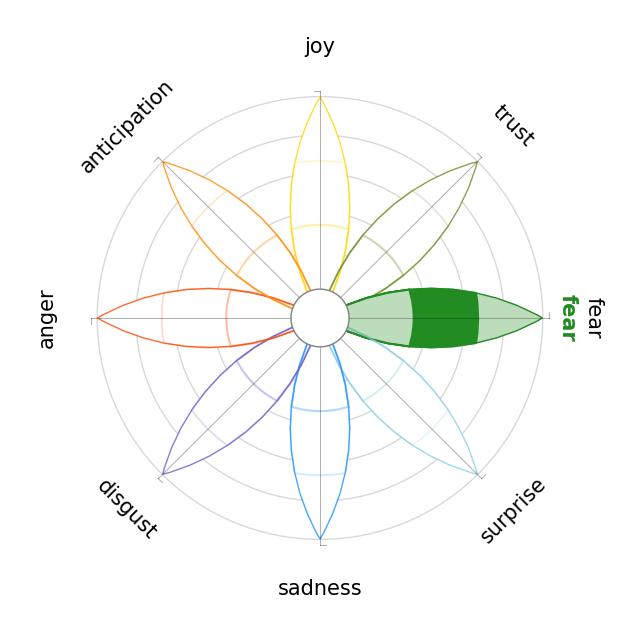

In [3]:
emotions = {'joy': [0.334, 0.333, 0.333],
            'trust': [0.334, 0.333, 0.333],
            'fear': [0.334, 0.333, 0.333],
            'surprise': [0.334, 0.333, 0.333],
            'sadness': [0.334, 0.333, 0.333],
            'disgust': [0.334, 0.333, 0.333],
            'anger': [0.334, 0.333, 0.333],
            'anticipation': [0.334, 0.333, 0.333]}

emotion_mapping = {
    'serenity': ['joy', 0], 'joy': ['joy', 1], 'ecstasy': ['joy', 2],
    'acceptance': ['trust', 0], 'trust': ['trust', 1], 'admiration': ['trust', 2],
    'apprehension': ['fear', 0], 'fear': ['fear', 1], 'terror': ['fear', 2],
    'distraction': ['surprise', 0], 'surprise': ['surprise', 1], 'amazement': ['surprise', 2],
    'pensiveness': ['sadness', 0], 'sadness': ['sadness', 1], 'grief': ['sadness', 2],
    'boredom': ['disgust', 0], 'disgust': ['disgust', 1], 'loathing': ['disgust', 2],
    'annoyance': ['anger', 0], 'anger': ['anger', 1], 'rage': ['anger', 2],
    'interest': ['anticipation', 0], 'anticipation': ['anticipation', 1], 'vigilance': ['anticipation', 2],
}


plotx = plutchik(emotions, highlight_emotions=emotion_mapping['fear'][0], highlight_intensity=emotion_mapping['fear'][1], sub_emotion='fear')

In [5]:
type(plotx)

matplotlib.axes._subplots.AxesSubplot